In [99]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class Model(nn.Module):
    def __init__(self, input_dim, middle_dim, output_dim):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, middle_dim),
            nn.ReLU(),
            nn.Linear(middle_dim, middle_dim),
            nn.ReLU(),
            nn.Linear(middle_dim, middle_dim),
            nn.ReLU(),
            nn.Linear(middle_dim, output_dim),
        )
    
    def forward(self, x):
        out = self.model(x)
        return out

# Create our model
model = Model(1, 512, 1)

# Define loss function and optimizer
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [100]:
X = np.random.rand(10**5) * 2 * np.pi
y = np.sin(X).ravel() + np.cos(X).ravel()
y = np.sin(X).ravel() + np.cos(X).ravel() + np.sin(2*X).ravel() + np.cos(2*X).ravel() + np.sin(3*X).ravel() + np.cos(3*X).ravel() + np.sin(4*X).ravel() + np.cos(4*X).ravel() + np.sin(5*X).ravel() + np.cos(5*X).ravel()

# These are dataloaders which are responsible for splitting the test and train data into batches
# that can be fed into the model for training
X_train, X_test, y_train, y_test = map(torch.tensor, train_test_split(X, y, test_size=0.2))
train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=64, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(TensorDataset(X_test.unsqueeze(1), y_test.unsqueeze(1)), batch_size=64, pin_memory=True, shuffle=True)

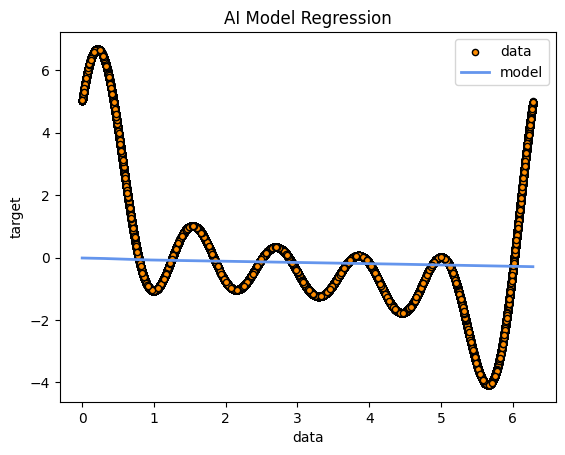

In [101]:
lin_test = np.arange(0.0, 2*np.pi, 0.01)[:, np.newaxis]
with torch.no_grad():
    y_1 = model(torch.from_numpy(lin_test).float())

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(lin_test, y_1, color="cornflowerblue", label="model", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("AI Model Regression")
plt.legend()
plt.show()

epoch 0, loss 1.0777254104614258
epoch 1, loss 1.7637887001037598
epoch 2, loss 2.0735909938812256
epoch 3, loss 2.131795644760132
epoch 4, loss 1.7662034034729004
epoch 5, loss 1.8365223407745361
epoch 6, loss 1.2880228757858276
epoch 7, loss 2.2791714668273926
epoch 8, loss 0.8464979529380798
epoch 9, loss 0.515873372554779
epoch 10, loss 1.1643335819244385
epoch 11, loss 0.6266605854034424
epoch 12, loss 1.9538829326629639
epoch 13, loss 1.0209898948669434
epoch 14, loss 0.688370943069458
epoch 15, loss 1.08674955368042
epoch 16, loss 2.432335138320923
epoch 17, loss 1.0176162719726562
epoch 18, loss 2.1814475059509277
epoch 19, loss 2.05426287651062
epoch 20, loss 1.9457300901412964
epoch 21, loss 0.6805272102355957
epoch 22, loss 0.9100531935691833
epoch 23, loss 1.0413308143615723
epoch 24, loss 0.6525856852531433
epoch 25, loss 1.2502176761627197
epoch 26, loss 0.4343056082725525
epoch 27, loss 0.8923308849334717
epoch 28, loss 1.3580373525619507
epoch 29, loss 0.596728444099426

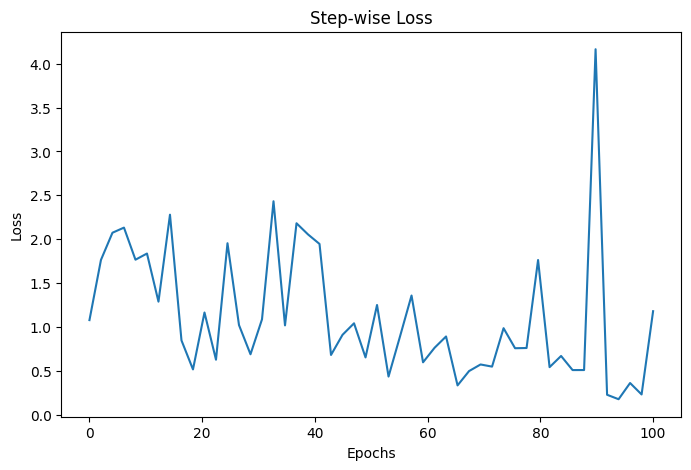

In [102]:
loss_values = []
epochs = 100

for epoch in range(epochs):
    for train, expected in train_dataloader:
        train = train.type(torch.float32)
        expected = expected.type(torch.float32)

        optimizer.zero_grad()

        # Feed the data into our model
        y_pred = model(train)

        # Calculate the loss (how far off the model is from the expected result)
        # then backpropagate the error to adjust the model's weights
        loss = criterion(y_pred, expected)
        loss.backward()
        optimizer.step()
    loss_values.append(loss.item())

    print('epoch {}, loss {}'.format(epoch, loss.item()))

step = np.linspace(0, 100, epochs)
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

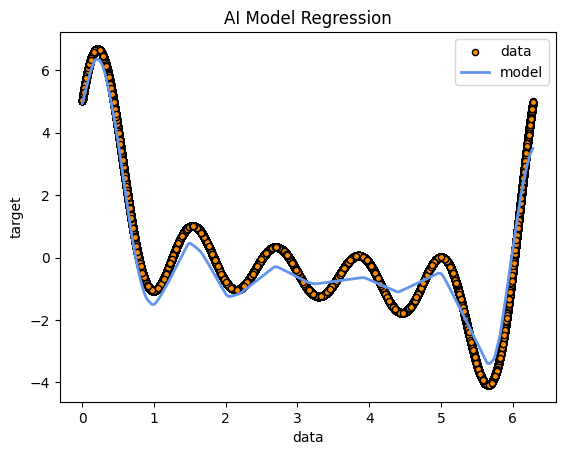

In [103]:
lin_test = np.arange(0.0, 2*np.pi, 0.01)[:, np.newaxis]
with torch.no_grad():
    y_1 = model(torch.from_numpy(lin_test).float())

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(lin_test, y_1, color="cornflowerblue", label="model", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("AI Model Regression")
plt.legend()
plt.show()